In [2]:
# 正規方程式で線形回帰を行う場合に気を付けることはメモリに収まるデータ量なら高速だが特徴量が非常に多い場合はふむきであること
# 最下部にscikit-learnを用いた方法があるため普段はこちらを使用
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
# ランダムシードの設定
np.random.seed(42)

# To plot pretty figures
# matplotの共通設定
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [3]:
# モデル訓練用のデータをプロットしてみる
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

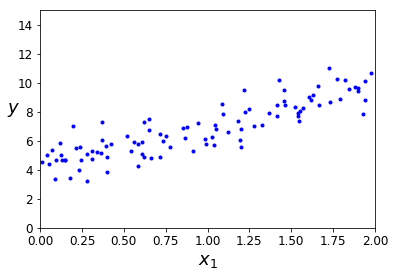

In [5]:
# 実際にプロットしたグラフを表示
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18) # ラベル名とフォントサイズを設定
plt.ylabel("$y$", rotation=0, fontsize=18) #ラベル名とフォントサイズを設定
plt.axis([0, 2, 0, 15]) # X軸は0～2、y軸は0～15
plt.savefig("generated_data_plot")
plt.show()

In [6]:
# 正規方程式　コスト関数を最小化する値を直接探す
X_b = np.c_[np.ones((100, 1)), X]
# np.c_ は2次元以上の配列で、最も最低の次元(axisの番号が一番大きい)の方向で配列を結合する
# (100,1) の全値が1の行列と2次元以上の配列とXの配列を結合するということ
# 単位行列は主対角線上の要素がすべて 1で，その他はすべて 0であるものを n 次の単位行列という
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # np.linalg.in()は逆行列を求める関数　この式はP.110の正規方程式のpython版

In [7]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [8]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

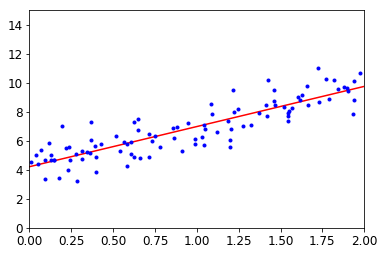

In [9]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [10]:
# 上記はscikit-learnだと以下のようになる
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [11]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])